data source : https://fred.stlouisfed.org/series/NIKKEI225

In [1]:
import pandas as pd
import numpy as np
from math import floor
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [2]:
datas = pd.read_csv('NIKKEI225.csv')
datas.head()

,DATE,NIKKEI225
0,2014-11-17,16973.80
1,2014-11-18,17344.06
2,2014-11-19,17288.75
3,2014-11-20,17300.86
4,2014-11-21,17357.51


In [3]:
new_datas = []

for i in range(len(datas)):
    if datas.iloc[i]['NIKKEI225'] != '.':
        new_datas.append(datas.iloc[i]['NIKKEI225'])

training_set = new_datas[:floor(len(new_datas)*0.9)]
test_set = new_datas[floor(len(new_datas)*0.9):]

print(len(new_datas), len(training_set), len(test_set))

1221 1098 123


In [4]:
training_set = np.reshape(training_set, (len(training_set), 1))
test_set = np.reshape(test_set, (len(test_set), 1))

# A. Using 60 timestamps

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
training_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
len(X_train)

1038

### Using the previous model parameters

In [6]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1038/1038 [==============================] - 8s 8ms/step - loss: 0.0696
Epoch 2/100
1038/1038 [==============================] - 6s 6ms/step - loss: 0.0120
Epoch 3/100
1038/1038 [==============================] - 6s 6ms/step - loss: 0.0098
Epoch 4/100
1038/1038 [==============================] - 6s 6ms/step - loss: 0.0089
Epoch 5/100
1038/1038 [==============================] - 6s 6ms/step - loss: 0.0077
Epoch 6/100
1038/1038 [==============================] - 6s 6ms/step - loss: 0.0088
Epoch 7/100
1038/1038 [==============================] - 6s 6ms/step - loss: 0.0073
Epoch 8/100
1038/1038 [==============================] - 6s 6ms/step - loss: 0.0098
Epoch 9/100
1038/1038 [==============================] - 6s 6ms/step - loss: 0.0082
Epoch 10/100
1038/1038 [==============================] - 7s 6ms/step - loss: 0.0068
Epoch 11/100
1038/1038 [==============================] - 8s 8ms/step - loss: 0.0076
Epoch 12/100
1038/1038 [==============================] - 7s 7ms/step - lo

In [8]:
inputs = np.reshape(new_datas, (-1,1))
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(test_set)+60):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred = regressor.predict(X_test)
pred = sc.inverse_transform(pred)

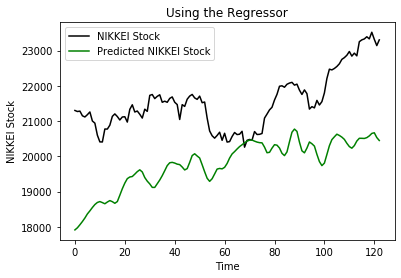

In [24]:
pred = pd.DataFrame(pred)[0]
real = []
for elm in test_set:
    real.append(float(elm))
real = pd.DataFrame(real)[0]

plt.plot(real, color='black', label='NIKKEI Stock')
plt.plot(pred, color='green', label='Predicted NIKKEI Stock')
plt.title('Using the Regressor')
plt.xlabel('Time')
plt.ylabel('NIKKEI Stock')
plt.legend()
plt.show()

In [25]:
mean_squared_error(real, pred)

3697317.252353237

### Remove one LSTM and Droupout Layer

In [17]:
regressor2 = Sequential()
regressor2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units=50, return_sequences=True))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units=50))
regressor2.add(Dropout(0.2))

regressor2.add(Dense(units=1))

regressor2.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
regressor2.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1038/1038 [==============================] - 6s 6ms/step - loss: 0.0478
Epoch 2/100
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0093
Epoch 3/100
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0081
Epoch 4/100
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0076
Epoch 5/100
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0063
Epoch 6/100
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0070
Epoch 7/100
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0061
Epoch 8/100
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0061
Epoch 9/100
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0062
Epoch 10/100
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0055
Epoch 11/100
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0054
Epoch 12/100
1038/1038 [==============================] - 4s 4ms/step - lo

In [20]:
pred2 = regressor2.predict(X_test)
pred2 = sc.inverse_transform(pred2)

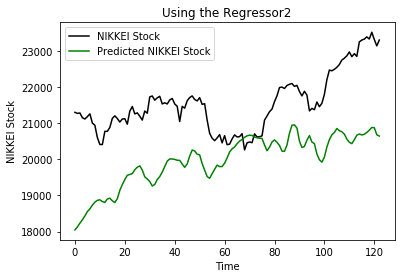

In [22]:
plt.plot(real, color='black', label='NIKKEI Stock')
plt.plot(pred2, color='green', label='Predicted NIKKEI Stock')
plt.title('Using the Regressor2')
plt.xlabel('Time')
plt.ylabel('NIKKEI Stock')
plt.legend()
plt.show()

In [23]:
mean_squared_error(real, pred2)

3073773.2479056083

### Changes the epochs

In [26]:
regressor2.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0017
Epoch 2/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0018
Epoch 3/200
1038/1038 [==============================] - 5s 4ms/step - loss: 0.0019
Epoch 4/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0018
Epoch 5/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0019
Epoch 6/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0020
Epoch 7/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0017
Epoch 8/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0018
Epoch 9/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0019
Epoch 10/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0017
Epoch 11/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0019
Epoch 12/200
1038/1038 [==============================] - 4s 4ms/step - lo

1038/1038 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 193/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0011
Epoch 194/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0013
Epoch 195/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 196/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 197/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0011
Epoch 198/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 199/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 200/200
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0012


In [27]:
pred3 = regressor2.predict(X_test)
pred3 = sc.inverse_transform(pred3)

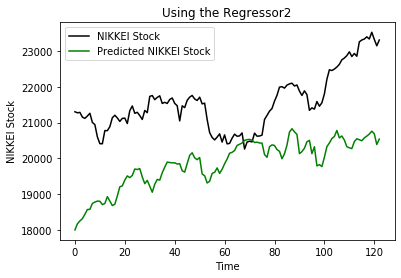

In [28]:
plt.plot(real, color='black', label='NIKKEI Stock')
plt.plot(pred3, color='green', label='Predicted NIKKEI Stock')
plt.title('Using the Regressor2')
plt.xlabel('Time')
plt.ylabel('NIKKEI Stock')
plt.legend()
plt.show()

In [30]:
mean_squared_error(real, pred3)

3434778.2022374393

### Change the batch size

In [31]:
regressor2.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
1038/1038 [==============================] - 7s 7ms/step - loss: 0.0012
Epoch 2/100
1038/1038 [==============================] - 7s 7ms/step - loss: 0.0013
Epoch 3/100
1038/1038 [==============================] - 7s 7ms/step - loss: 0.0012
Epoch 4/100
1038/1038 [==============================] - 7s 7ms/step - loss: 0.0014
Epoch 5/100
1038/1038 [==============================] - 8s 7ms/step - loss: 0.0013
Epoch 6/100
1038/1038 [==============================] - 8s 7ms/step - loss: 0.0013
Epoch 7/100
1038/1038 [==============================] - 8s 7ms/step - loss: 0.0013
Epoch 8/100
1038/1038 [==============================] - 7s 7ms/step - loss: 0.0013
Epoch 9/100
1038/1038 [==============================] - 7s 7ms/step - loss: 0.0013
Epoch 10/100
1038/1038 [==============================] - 8s 7ms/step - loss: 0.0014
Epoch 11/100
1038/1038 [==============================] - 8s 7ms/step - loss: 0.0012
Epoch 12/100
1038/1038 [==============================] - 8s 7ms/step - lo

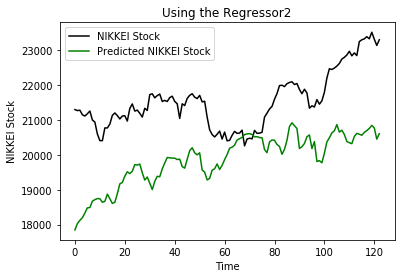

In [33]:
pred4 = regressor2.predict(X_test)
pred4 = sc.inverse_transform(pred4)

plt.plot(real, color='black', label='NIKKEI Stock')
plt.plot(pred4, color='green', label='Predicted NIKKEI Stock')
plt.title('Using the Regressor2')
plt.xlabel('Time')
plt.ylabel('NIKKEI Stock')
plt.legend()
plt.show()

In [34]:
mean_squared_error(real, pred4)

3409196.2989273337

### Remove one LSTM & Dropout Layer again

In [35]:
regressor3 = Sequential()
regressor3.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor3.add(Dropout(0.2))

regressor3.add(LSTM(units=50))
regressor3.add(Dropout(0.2))

regressor3.add(Dense(units=1))

regressor3.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
regressor3.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0638
Epoch 2/100
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0080
Epoch 3/100
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0066
Epoch 4/100
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0056
Epoch 5/100
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0054
Epoch 6/100
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0053A: 0s - loss: 0.005
Epoch 7/100
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0052
Epoch 8/100
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 9/100
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0049
Epoch 10/100
1038/1038 [==============================] - ETA: 0s - loss: 0.004 - 3s 3ms/step - loss: 0.0048
Epoch 11/100
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0045
Epoch 12/100
1038/1038 [=======

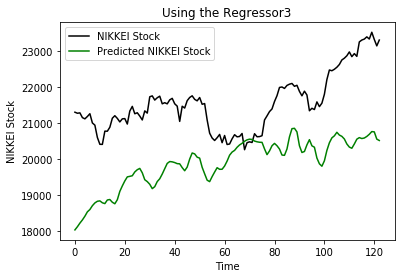

In [37]:
pred5 = regressor3.predict(X_test)
pred5 = sc.inverse_transform(pred5)

plt.plot(real, color='black', label='NIKKEI Stock')
plt.plot(pred5, color='green', label='Predicted NIKKEI Stock')
plt.title('Using the Regressor3')
plt.xlabel('Time')
plt.ylabel('NIKKEI Stock')
plt.legend()
plt.show()

In [38]:
mean_squared_error(real, pred5)

3343407.469501052

Conclusion (60 timestamps) : 

# B. Using 7 timestamps

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
training_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(7, len(training_set)):
    X_train.append(training_scaled[i-7:i, 0])
    y_train.append(training_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
len(X_train)

1091

In [11]:
### Using the previous model parameters

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1091/1091 [==============================] - 6s 5ms/step - loss: 0.0828
Epoch 2/100
1091/1091 [==============================] - 1s 1ms/step - loss: 0.0125
Epoch 3/100
1091/1091 [==============================] - 1s 959us/step - loss: 0.0087 0s - loss: 0.
Epoch 4/100
1091/1091 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 5/100
1091/1091 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 6/100
1091/1091 [==============================] - 1s 1ms/step - loss: 0.0062A: 0s - l
Epoch 7/100
1091/1091 [==============================] - 1s 1ms/step - loss: 0.0062A: 1s  - ETA: 0s - loss: 0.006
Epoch 8/100
1091/1091 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 9/100
1091/1091 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 10/100
1091/1091 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 11/100
1091/1091 [==============================] - ETA: 0s - loss: 0.005 - 1s 1ms/step - loss: 0.

In [12]:
inputs = np.reshape(new_datas, (-1,1))
inputs = sc.transform(inputs)

X_test = []
for i in range(7, len(test_set)+7):
    X_test.append(inputs[i-7:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred = regressor.predict(X_test)
pred = sc.inverse_transform(pred)

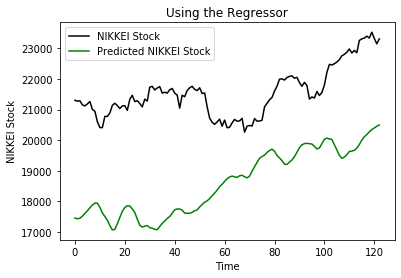

In [13]:
pred = pd.DataFrame(pred)[0]
real = []
for elm in test_set:
    real.append(float(elm))
real = pd.DataFrame(real)[0]

plt.plot(real, color='black', label='NIKKEI Stock')
plt.plot(pred, color='green', label='Predicted NIKKEI Stock')
plt.title('Using the Regressor')
plt.xlabel('Time')
plt.ylabel('NIKKEI Stock')
plt.legend()
plt.show()

In [14]:
mean_squared_error(real, pred)

9429443.836689116

# C. Using 30 timestamps

In [15]:
sc = MinMaxScaler(feature_range=(0,1))
training_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(30, len(training_set)):
    X_train.append(training_scaled[i-30:i, 0])
    y_train.append(training_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
len(X_train)

1068

In [17]:
### Using the previous model parameters

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1068/1068 [==============================] - 9s 8ms/step - loss: 0.0491
Epoch 2/100
1068/1068 [==============================] - 4s 4ms/step - loss: 0.0106
Epoch 3/100
1068/1068 [==============================] - 4s 4ms/step - loss: 0.0096
Epoch 4/100
1068/1068 [==============================] - 4s 3ms/step - loss: 0.0087
Epoch 5/100
1068/1068 [==============================] - 3s 3ms/step - loss: 0.0078
Epoch 6/100
1068/1068 [==============================] - 4s 4ms/step - loss: 0.0089
Epoch 7/100
1068/1068 [==============================] - 4s 4ms/step - loss: 0.0074
Epoch 8/100
1068/1068 [==============================] - 4s 4ms/step - loss: 0.0076
Epoch 9/100
1068/1068 [==============================] - 4s 3ms/step - loss: 0.0069
Epoch 10/100
1068/1068 [==============================] - 4s 3ms/step - loss: 0.0068
Epoch 11/100
1068/1068 [==============================] - 4s 3ms/step - loss: 0.0065
Epoch 12/100
1068/1068 [==============================] - 4s 4ms/step - lo

In [18]:
inputs = np.reshape(new_datas, (-1,1))
inputs = sc.transform(inputs)

X_test = []
for i in range(30, len(test_set)+30):
    X_test.append(inputs[i-30:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred = regressor.predict(X_test)
pred = sc.inverse_transform(pred)

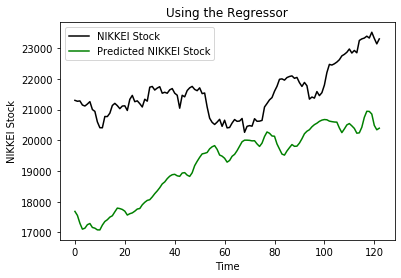

In [19]:
pred = pd.DataFrame(pred)[0]
real = []
for elm in test_set:
    real.append(float(elm))
real = pd.DataFrame(real)[0]

plt.plot(real, color='black', label='NIKKEI Stock')
plt.plot(pred, color='green', label='Predicted NIKKEI Stock')
plt.title('Using the Regressor')
plt.xlabel('Time')
plt.ylabel('NIKKEI Stock')
plt.legend()
plt.show()

In [20]:
mean_squared_error(real, pred)

6373414.797338462

# D. Using 90 timestamps

In [5]:
sc = MinMaxScaler(feature_range=(0,1))
training_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(90, len(training_set)):
    X_train.append(training_scaled[i-90:i, 0])
    y_train.append(training_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
len(X_train)

1008

In [7]:
### Using the previous model parameters

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1008/1008 [==============================] - 6s 6ms/step - loss: 0.0570
Epoch 2/100
1008/1008 [==============================] - 4s 4ms/step - loss: 0.0110
Epoch 3/100
1008/1008 [==============================] - 4s 4ms/step - loss: 0.0091
Epoch 4/100
1008/1008 [==============================] - 4s 4ms/step - loss: 0.0085
Epoch 5/100
1008/1008 [==============================] - 4s 4ms/step - loss: 0.0093
Epoch 6/100
1008/1008 [==============================] - 4s 4ms/step - loss: 0.0082
Epoch 7/100
1008/1008 [==============================] - 5s 5ms/step - loss: 0.0076
Epoch 8/100
1008/1008 [==============================] - 5s 5ms/step - loss: 0.0078
Epoch 9/100
1008/1008 [==============================] - 6s 6ms/step - loss: 0.0070
Epoch 10/100
1008/1008 [==============================] - 5s 5ms/step - loss: 0.0069
Epoch 11/100
1008/1008 [==============================] - 5s 4ms/step - loss: 0.0071
Epoch 12/100
1008/1008 [==============================] - 5s 5ms/step - lo

1008/1008 [==============================] - 5s 5ms/step - loss: 0.0021
Epoch 97/100
1008/1008 [==============================] - 5s 5ms/step - loss: 0.0018
Epoch 98/100
1008/1008 [==============================] - 5s 5ms/step - loss: 0.0020
Epoch 99/100
1008/1008 [==============================] - 5s 5ms/step - loss: 0.0022
Epoch 100/100
1008/1008 [==============================] - 5s 5ms/step - loss: 0.0019


In [8]:
inputs = np.reshape(new_datas, (-1,1))
inputs = sc.transform(inputs)

X_test = []
for i in range(90, len(test_set)+90):
    X_test.append(inputs[i-90:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred = regressor.predict(X_test)
pred = sc.inverse_transform(pred)

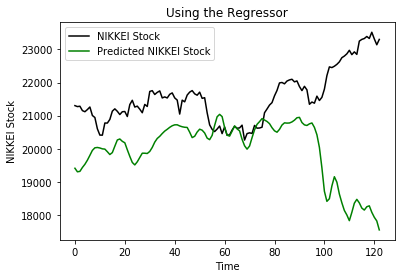

In [9]:
pred = pd.DataFrame(pred)[0]
real = []
for elm in test_set:
    real.append(float(elm))
real = pd.DataFrame(real)[0]

plt.plot(real, color='black', label='NIKKEI Stock')
plt.plot(pred, color='green', label='Predicted NIKKEI Stock')
plt.title('Using the Regressor')
plt.xlabel('Time')
plt.ylabel('NIKKEI Stock')
plt.legend()
plt.show()

In [10]:
mean_squared_error(real, pred)

4969164.576860428